# Deferred Correction Method for ODEs


Lagrange-Polynomials:
https://math.stackexchange.com/questions/1105160/evaluate-derivative-of-lagrange-polynomials-at-construction-points

## Lagrange-Polynomials

See https://en.wikipedia.org/wiki/Lagrange_polynomial

Given a set of m points:
$(\phi_0, t_0), (\phi_1, t_1),..., (\phi_m, t_m)$.

The interpolation polynomial in the Lagrangian form is defined as
$$
L^m(t, \phi) = \sum_{i=0}^{m} c_i(t) \cdot \phi_i
$$

with the Lagrangioan basis polynomial
$$
c_i(t) = \prod_{j=0, j\neq i}^{m} \frac{t-t_j}{t_i - t_j} 
$$

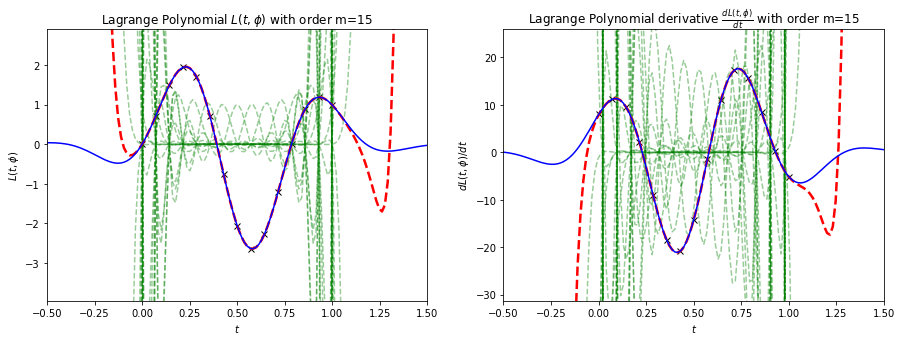

In [17]:
import numpy as np
from matplotlib import pyplot as plt


'''
*************************************************************
   Function to calculate the m Langrange-Polynomial-Basis
   of an Lagrange-Polynomial L(t, phi) with grade m
*************************************************************
'''
def lagrange_polybasis(t_i, t):
    # Calculate Lagrangian basis polyonmial basis functions
    m = len(t_i)
    polybasis = []
    for i in range(0,m):
        polybasis.append(1)
        for j in range(0,m):
            if (j == i):
                continue
            else:
                c_i = (t - t_i[j])/(t_i[i] - t_i[j])
                polybasis[i] *= c_i
        
    return polybasis


'''
*************************************************************
   Function to calculate the m Langrange-Polynomial-Basis
   of the derivative of an Lagrange-Polynomial L(t, phi) 
   with grade m
*************************************************************
'''
def lagrange_polybasis_ddt(t_i, t):
    # Calculate Lagrangian basis polyonmial basis functions
    m = len(t_i)
    polybasis = []
    
    for i in range(0,m):
        polybasis.append(0.0)
        
        for j in range(0,m):
            c = 1.0
            if (j==i):
                continue
            else:
                for k in range(0,m):
                    if (k == i or k == j):
                        continue
                    else:
                        c_i = (t - t_i[k])/(t_i[i] - t_i[k])
                        c *= c_i
                        
            polybasis[i] +=  c / (t_i[i] - t_i[j])
  
    return polybasis


'''
*************************************************************
   Function to calculate the Langrange-Polynomial
   L(t,phi)
*************************************************************
'''
def lagrange_polynom(polybasis, phi):
    # Calculate Lagrangian basis polyonmial basis functions
    m = len(phi)
    L = np.zeros(len(polybasis[0]))
    for i, c_i in enumerate(polybasis):
        L += c_i * phi[i]
    return L






'''-------------------------------------------------
    Define polynomial L(t,phi) and 
    its derivative dL/t,phi)/dt
-------------------------------------------------'''
f     = lambda x: np.sin(8*x) * np.exp(1.0-4*(x-0.5)**2)
f_ddx = lambda x: -8.0*(x-0.5) * f(x) + 8*np.cos(8*x) * np.exp(1.0-4*(x-0.5)**2)

t = np.linspace(-1,2,200)
phi = f(t)
phi_ddt = f_ddx(t)

# Order of L(t, phi)
m = 15
t_i       = np.linspace(0,1,m)
phi_i     = f(t_i)
phi_i_ddt = f_ddx(t_i)


c = lagrange_polybasis(t_i, t)
c_ddt = lagrange_polybasis_ddt(t_i, t)
L = lagrange_polynom(c, phi_i)
L_ddt = lagrange_polynom(c_ddt, phi_i)


'''-------------------------------------------------
    Plot polynomials
-------------------------------------------------'''
fig = plt.figure()
fig.set_size_inches(15, 5)

# Subplot 1
ax1 = fig.add_subplot(121)

# Plot interpolation points
for i, p in enumerate(phi_i):
    ax1.plot(t_i[i], p, c='k', marker='x')

# Plot polynomial basis of L(t, phi)
for i, c_i in enumerate(c):
    ax1.plot(t, c_i, c='g', ls='--', alpha=0.4)

# Plot L(t, phi)
ax1.plot(t, L, c='r', ls='--', lw=2.5)

# Plot phi
ax1.plot(t, phi, c='b', ls='-')

ax1.set_title(r'Lagrange Polynomial $L(t, \phi)$ with order m=' + str(m))
ax1.set_xlabel('$t$')
ax1.set_ylabel(r'$L(t, \phi)$')
ax1.set_ylim(np.min(phi_i)+0.5*np.min(phi_i), 
             np.max(phi_i)+0.5*np.max(phi_i)) 
ax1.set_xlim([-0.5, 1.5])



# Subplot 2
ax2 = fig.add_subplot(122)

# Plot interpolation points
for i, p in enumerate(phi_i_ddt):
    ax2.plot(t_i[i], p, c='k', marker='x')
    
# Plot derivative of polynomial basis of L(t, phi)
for i, c_i in enumerate(c_ddt):
    ax2.plot(t, c_i, c='g', ls='--', alpha=0.4)
    
# Plot dL(t,phi)/dt
ax2.plot(t, L_ddt, c='r', ls='--', lw=2.5)

# Plot dphi/dt
ax2.plot(t, phi_ddt, c='b', ls='-')
 
ax2.set_title(r'Lagrange Polynomial derivative $\frac{dL(t, \phi)}{dt}$ with order m=' + str(m))
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$dL(t, \phi)/dt$')
ax2.set_ylim(np.min(phi_i_ddt)+0.5*np.min(phi_i_ddt), 
             np.max(phi_i_ddt)+0.5*np.max(phi_i_ddt)) 
ax2.set_xlim([-0.5, 1.5])

plt.show()

## Discretization to one-dimensional function

$$ 
\frac{\partial \phi }{\partial t} = f(t, \phi) = \lambda \cdot \phi(t) 
$$
$$
\phi(0) = \phi_0
$$

Analytic solution:
$$
\phi(t) = \phi_0 \cdot e^{\lambda t}
$$

Discretization through Euler explicit:
$$ 
\frac{\partial \phi }{\partial t} \approx \frac{\phi^{n+1} - \phi^{n}}{\Delta t}
$$


Full discretized equation:
$$
\frac{\phi^{n+1} - \phi^{n}}{\Delta t} = \lambda \phi^n
$$
$$
\phi^{n+1} = (1 + \Delta t \cdot \lambda) \cdot  \phi^n 
$$



Calculate 200 timesteps for timestep-size 5.00e-03s


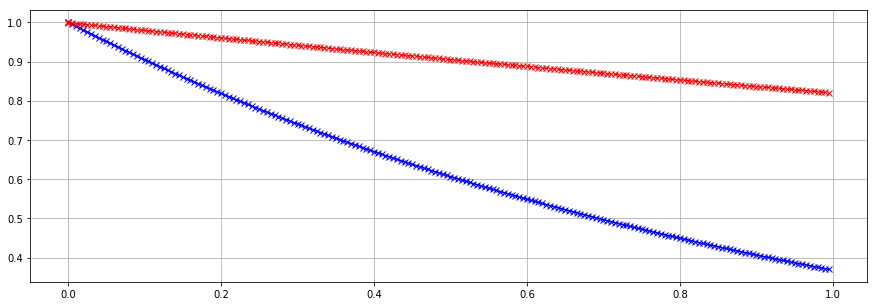

In [99]:
import numpy as np
from matplotlib import pyplot as plt

# Initial conditions
phi_0 = 1.0
lam = -1.0


# Timestepping properties
dt = 5e-3              # Timestep
t0 = 0.0               # Starting time
t1 = 1.0              # Ending time
Nt = int((t1-t0)/dt)   # Number of timesteps
t  = np.linspace(0, dt, 100)

# Sub-timestepping properties
n_it = 25    # Number of sub-timesteps
n_err = 4   # Number of successive coorections

# Equidistant sub-timesteps
# dt_it = np.linspace(0, dt, n_it)   

# Chebyshev sub-timesteps
dt_it = []
for ind in range(1, n_it+1):
    dt_cheb = 0.5*(t1 + t0) + 0.5*(t1-t0) * np.cos(np.pi*((2*ind-1)/(2*n_it)))
    dt_it.append(dt_cheb)
dt_it = np.array(dt_it)

print("Calculate %d timesteps for timestep-size %3.2es" % (Nt, dt))

# Initialize solution arrays
phi  = [phi_0]
err  = [0.0]
t_it = [0.0]

# Calculate lagrangian polynomial for substep-phi
c     = lagrange_polybasis(dt_it, dt_it)
c_ddt = lagrange_polybasis_ddt(dt_it, dt_it)

'''
-------------------------------------------------------
Timestep-iteration
-------------------------------------------------------
'''
for n in range(0, Nt):
    # Init sub-arrays
    phi_sub = [0.0] * n_it
    err_sub = [0.0] * n_it
    
    # --- Compute initial approximation ---
    # Using kth order method, compute an approximate 
    # solution of phi[n+1] at grid points t_i on interval [t_n, t_n+dt]
    for n_i, dt_i in enumerate(dt_it):
        # --> euler first order explicit
        # phi_sub[n_i] = (1.0 + dt_i * lam) * phi[n]
        # --> euler first order implicit
        # phi_sub[n_i] = phi[n] / (1. - dt_i * lam)
        # --> 2nd order crank-nicolson
        phi_sub[n_i] = phi[n] * (2. + lam * dt_i) / (2. - lam * dt_i)
      
    if (n_it > 2):
        # --- Compute successive corrections ---
        for j in range(0, n_err):
            L     = lagrange_polynom(np.array(c), np.array(phi_sub))
            L_ddt = lagrange_polynom(np.array(c_ddt), np.array(phi_sub))

            for n_i, dt_i in enumerate(dt_it):
                # Compute approximate solution to error function equation
                # --> Euler first order explicit
                # err_sub[n_i] = err[n] + dt_i * (lam * (err[n] + L[n_i]) - L_ddt[n_i])
                # --> Euler first order implicit 
                err_sub[n_i] = (err[n] + dt_i * (lam * L[n_i] - L_ddt[n_i])) / (1. - dt_i*lam)
                
                # Define new approximate solution
                phi_sub[n_i] += err_sub[n_i]
    
    # Update new approximation for timestep n+1
    phi.append(phi_sub[-1])
    err.append(err_sub[-1])
    t_it.append(n*dt)
    
    
    
'''-------------------------------------------------
    Solution
-------------------------------------------------'''
# Analytic solution
phi_ana = lambda x: phi_0 * np.exp(lam * x)

fig = plt.figure()
fig.set_size_inches(15, 5)

# Subplot 1
ax1 = fig.add_subplot(111)

ax1.plot(t_it, phi_ana(np.array(t_it)), c='b', ls='-', marker='x')
ax1.plot(t_it, phi, c='r', ls='--', marker='x')
ax1.grid(True)


plt.show()

In [8]:
a = np.array([1,2,3,4,5])
b = 3*a
b += 4*b
print(b)

[15 30 45 60 75]


In [15]:
a = np.zeros(2)

a += np.array([1,2])
print(a)

[1. 2.]
